In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import os

In [19]:
img = image.load_img(r'../input/urecamain/Train/Fire/SynDay1221.jpg')

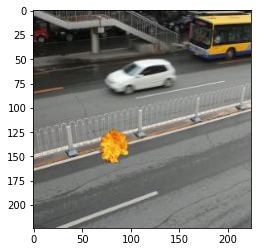

In [5]:
plt.imshow(img)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory(r'../input/urecamain/Train',target_size=(50,50),batch_size=3,class_mode='binary')

validation_dataset = validation.flow_from_directory(r'../input/urecamain/Vali',target_size=(50,50),batch_size=3,class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
input_shape = (50, 50, 3)

model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(filters = 64,
                                kernel_size = 3, 
                                activation='relu',
                                input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2),
        
        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
        tf.keras.layers.MaxPool2D(2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(1,activation='sigmoid')
        ])

In [9]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,epochs=10 ,validation_data=validation_dataset)

Epoch 1/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.2476 - accuracy: 0.8979 - val_loss: 0.3170 - val_accuracy: 0.8820
Epoch 2/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.2032 - accuracy: 0.9217 - val_loss: 0.2760 - val_accuracy: 0.8940
Epoch 3/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.1822 - accuracy: 0.9310 - val_loss: 0.2456 - val_accuracy: 0.9095
Epoch 4/10
2001/2001 [==============================] - 43s 21ms/step - loss: 0.1574 - accuracy: 0.9387 - val_loss: 0.2289 - val_accuracy: 0.9240
Epoch 5/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.1318 - accuracy: 0.9464 - val_loss: 0.2500 - val_accuracy: 0.9160
Epoch 6/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.1184 - accuracy: 0.9565 - val_loss: 0.2111 - val_accuracy: 0.9320
Epoch 7/10
2001/2001 [==============================] - 42s 21ms/step - loss: 0.1046 - accuracy: 0.9610 - val_loss: 0.2321 -

In [13]:
validation_dataset.class_indices

{'Fire': 0, 'Non-Fire': 1}

In [14]:
dir_path = r'../input/urecamain/Test/Non-Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(50,50))
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
print(fire,nonfire)

810 190


In [16]:
dir_path = r'../input/urecamain/Test/Fire'

fire,nonfire = 0,0
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+i,target_size=(50,50))
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        fire+=1
        print(0,end=' ')
    else:
        nonfire+=1
        print(1,end=' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [17]:
print(fire,nonfire)

980 20
